Before doing any modelling, the data must be read in from .csv files, and the resulting DataFrame should be analyzed and understood.

In [1]:
import pandas as pd

# define a function for code reproducability later one (multiple seasons, inclusion of more pitchers, etc.)
def read_pitch_data(path):
    '''
    Reads in csv files for a given absolute or relative path.
    '''
    try:
        df = pd.read_csv(path)
        return df
    except FileNotFoundError as e:
        print(f'{e} \nRerun with an existing filename.')

In [2]:
# use function to read in csv file
train = read_pitch_data('pitchclassificationtrain.csv')

# and view first few rows 
train.head()

,pitchid,pitcherid,yearid,height,initspeed,breakx,breakz,initposx,initposz,extension,spinrate,type
0,1,5,1,72,83.774424,-1.293106,4.451670,-1.330641,6.065956,6.317961,1386.459243,3
1,2,5,1,72,89.642714,-6.550556,7.993455,-1.556463,5.719125,6.119526,1963.264977,9
2,3,4,1,72,91.750648,-6.985574,8.991264,-2.055134,5.780312,6.201200,2360.758263,9
3,4,5,1,72,83.189766,-2.549204,4.844714,-1.001020,6.240138,6.074156,858.997788,7
4,5,2,1,80,92.698738,-5.216516,7.267769,-2.097643,5.776138,6.212281,2060.155099,9


The data looks like it was read in correctly! Occasionally, there are parsing issues that arise if given a tab-separated file instead of a comma-separated one. In this case, there were no significant issues. One thing that should be adjusted, however, is the index row. By default, `pd.read_csv()` creates an additional column that is not a part of the DataFrame, but repres . In some cases, this is quite useful, but here there is already an existing `pitchid` column. Therefore, the index will be replaced below.

In [3]:
train.set_index('pitchid',inplace = True) # `inplace` redeclares changed df to original `train` variable

train.head()

,pitcherid,yearid,height,initspeed,breakx,breakz,initposx,initposz,extension,spinrate,type
pitchid,,,,,,,,,,,
1,5,1,72,83.774424,-1.293106,4.451670,-1.330641,6.065956,6.317961,1386.459243,3
2,5,1,72,89.642714,-6.550556,7.993455,-1.556463,5.719125,6.119526,1963.264977,9
3,4,1,72,91.750648,-6.985574,8.991264,-2.055134,5.780312,6.201200,2360.758263,9
4,5,1,72,83.189766,-2.549204,4.844714,-1.001020,6.240138,6.074156,858.997788,7
5,2,1,80,92.698738,-5.216516,7.267769,-2.097643,5.776138,6.212281,2060.155099,9


Now the `pitchid` replaces the dummy index as the new index. 

It is important to note that now, the index is 1-indexed compared to before where it was 0-indexed. 

Now, data interpretation begins. Numerous exploratory questions are important to understand, such as relevant data types, potential duplicated entries, and potential missing/invalid values. 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10647 entries, 1 to 10647
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pitcherid  10647 non-null  int64  
 1   yearid     10647 non-null  int64  
 2   height     10647 non-null  int64  
 3   initspeed  10647 non-null  float64
 4   breakx     10647 non-null  float64
 5   breakz     10647 non-null  float64
 6   initposx   10647 non-null  float64
 7   initposz   10647 non-null  float64
 8   extension  10647 non-null  float64
 9   spinrate   10647 non-null  float64
 10  type       10647 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 998.2 KB


Since the pitch data, the pitch data

In [5]:
train.select_dtypes(include = 'object') # includes strings, but not numerical values...

""
pitchid
1
2
3
4
5
...
10643
10644
10645


CHECK DUPES

In [6]:
train.shape[0] == train.count()

pitcherid    True
yearid       True
height       True
initspeed    True
breakx       True
breakz       True
initposx     True
initposz     True
extension    True
spinrate     True
type         True
dtype: bool

In [7]:
train.isna().sum() # .any()

pitcherid    0
yearid       0
height       0
initspeed    0
breakx       0
breakz       0
initposx     0
initposz     0
extension    0
spinrate     0
type         0
dtype: int64

In [8]:
train.duplicated().sum()

0

same for test

Finally, the most important, yet interpretable of these checks is to find the number of unique values that each column takes on...

train.nunique()

VLAUE COUNTS FOR EACH????

In [9]:
train['type'].value_counts()

10    3102
9     2952
2     1483
4     1330
7      901
8      674
3      205
Name: type, dtype: int64

In [10]:
train['height'].value_counts()

72    7449
80    2137
76    1049
77      12
Name: height, dtype: int64

In [11]:
train['pitcherid'].value_counts()

5    5609
2    2137
4    1840
1    1049
3      12
Name: pitcherid, dtype: int64

DROP PITCHER 3 ????

AVERAGE OF EACH 


In [12]:
train.groupby(['pitcherid']).mean()

,yearid,height,initspeed,breakx,breakz,initposx,initposz,extension,spinrate,type
pitcherid,,,,,,,,,,
1,1.622498,76.0,83.908213,-4.267288,0.801821,-1.936875,6.352940,6.189233,2203.901527,6.180172
2,1.459523,80.0,89.854474,-1.743194,4.147342,-2.257288,5.815367,6.200563,2235.687376,7.100608
3,2.000000,77.0,86.912987,5.549091,6.668309,4.063426,6.511092,6.176105,2070.742681,8.500000
4,1.371739,72.0,90.128965,-2.700970,5.894434,-2.004139,5.860586,6.197486,2310.786782,7.722283
5,1.537172,72.0,86.772190,-3.491820,5.154598,-1.305696,5.871023,6.201083,1736.181817,7.527188


In [13]:
train.loc[train['pitcherid'] == 3,'type'].value_counts()

10    6
9     4
3     2
Name: type, dtype: int64

This provides perhaps the most clear view of the data. From this it can be concluded:
- there are pitches from 5 pitchers included in this sample
- this sample has pitches from 2 years
- the 5 pitchers have 4 heights in inches (i.e. two share a height)
- each of the 10647 pitches has unique measurements (should be expected due to 6 decimal point precision)
- there are 7 pitch types (since this is the dependent variable, this will be the label in this model)

Finally, the data will be split into the feature vector X (for each feature x, $X = x_1, x_2,...x_n$) and the label vector, $y$.

In [14]:
y = train['type']

In [15]:
X = train.drop(['type'], axis=1, inplace=False)

Since this data is already split into training and testing sets, there is no need to split it again for that purpose. However, there is a benefit to doing this for another reason: the validation set. 

The validation set provides an evaluation of the models fit to the data, and allows for hyperparameter tuning before finalization. This is fundamentally analagous to the test set, but is a subset of the training set. It is of the utmost importance to prevent the model from 'seeing' the test set, until final model scoring. 

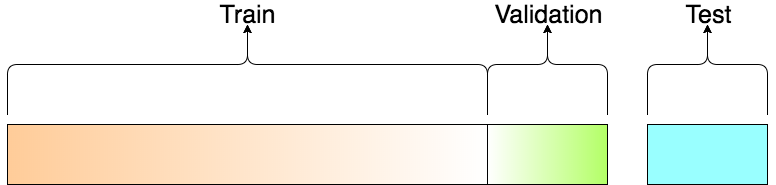

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val \
    = train_test_split(X, y, test_size=0.2, random_state=1) # random state for code reproducibility

print(X_train.shape) # 10647*.8 = 8517 
print(X_val.shape) # 10647*.2 = 2130

/Users/Daniel/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(8517, 10)
(2130, 10)


In [23]:
X_train.head()

,pitcherid,yearid,height,initspeed,breakx,breakz,initposx,initposz,extension,spinrate
pitchid,,,,,,,,,,
2401,2,1,80,93.687681,-2.310969,8.675631,-1.902397,5.961434,6.052528,2318.207190
6682,5,2,72,90.918378,-3.265904,9.675334,-1.287906,5.926465,6.172246,2045.643421
8518,4,2,72,94.488843,-7.695439,12.868088,-1.943843,5.781507,6.331792,2454.444928
9605,4,2,72,94.285058,-3.210703,9.403375,-2.106980,5.650563,6.428889,2588.760602
247,2,1,80,92.677048,-4.423301,9.884138,-2.683306,5.666469,6.104951,2254.935643


In [19]:
test = read_pitch_data('pitchclassificationtest.csv')

test.head()

,pitchid,pitcherid,yearid,height,initspeed,breakx,breakz,initposx,initposz,extension,spinrate
0,10648,3,3,77,84.456228,4.153646,9.338819,4.056353,6.486289,6.166051,2257.153203
1,10649,1,3,76,88.219799,-7.082679,3.091779,-2.218359,5.997977,6.527265,2200.836684
2,10650,1,3,76,86.351469,-7.998646,3.875420,-2.346287,5.919790,6.350896,2227.855798
3,10651,4,3,72,93.309879,-2.800042,8.270781,-1.850865,5.886583,6.044787,2188.735352
4,10652,3,3,77,85.284153,9.411612,7.600999,4.218555,6.536227,6.219090,2102.098895


NULL CHECK